# MLDM Lab week 3: Neural Networks - Perceptron and Multi-Layer Perceptron (MLP)

<h3> <font color="blue"> Introduction </h3>

In this lab session, we explore Perceptron and Multi-Layer Perceptron (MLP) using `sklearn`.

We revisit the Iris and the Breast Cancer datasets from previous lab sessions and train Perceptron and MLP classifiers using these datasets. Please see the information regarding these datasets from previous two lab sessions.

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1.  Learn how to create and use a Perceptron. </p>
<p> 2.  Learn how to create and use a MLP. </p>
<p> 3.  Learn how to create ROC curves to evaluate and compare models. </p>

## <font color="blue"> Training and evaluating a Perceptron 
In this experiment we re-visit the Iris dataset, however, instead of loading the dataset from a file or url, we load the dataset directly from the scikit-learn datasets. In this dataset, the third column represents the petal length, and the fourth column the petal width of the flower examples and the classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Preparing the training and test data by splitting the main dataset into 70% training and 30% test stes:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


The features can be standardised using the `StandardScaler`. See <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">`class sklearn.preprocessing.StandardScaler`</a> for more details.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### <font color="blue"> Training a Perceptron 
    
We train a Perceptron on the Iris dataset. In the first experiment we use simple and basic parameters. 
    
More information about Perceptron parameters can be found from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html"> `sklearn.linear_model.Perceptron` </a>.

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

**Note** You can replace `Perceptron(n_iter, ...)` by `Perceptron(max_iter, ...)` in scikit-learn >= 0.19. The `n_iter` parameter is used here deriberately, because some people still use scikit-learn 0.18.

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [7]:
print('Accuracy(test set): %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy (standardised test set): %.3f' % ppn.score(X_test_std, y_test))

Accuracy(test set): 0.978
Accuracy (standardised test set): 0.978


## <font color="blue"> Training and evaluating a Multi-Layer Perceptron (MLP)
In this experiment we re-visit the breast cancer dataset, however, instead of loading the dataset from scikit-learn datasets, we load the dataset from a csv file. Please download (and unzip) the breast cancer dataset from SurreyLearn and copy the file 'breast_cancer_data.csv' into your Jupyter working directory.

In [8]:
import pandas as pd
breast_cancer = pd.read_csv('breast_cancer_data.csv')
# Dataset Shape
print (breast_cancer.shape)

(569, 33)


In [9]:
# First Few Columns and Head Details
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<p> We need to specify the features which are used for machine learning. We need to remove the features which should be excluded, e.g. ID. We also need to specify the target feature, i.e. diagnosis class.
    Feature Engineering is the way of extracting features from data and transforming them into formats that are suitable for Machine Learning algorithms.</p> Here we are going to remove certain unwanted features.

In [10]:
# Features "id" and "Unnamed: 32" should be removed
feature_names = breast_cancer.columns[2:-1]
X = breast_cancer[feature_names]
# the target feature, i.e. diagnosis class
y = breast_cancer.diagnosis

<p>The traget feature in this dataset is included as a text value so it should be converted into a numerical value.</p>

In [11]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(breast_cancer.diagnosis.values)

In [12]:
breast_cancer[feature_names]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### <font color="blue"> Training a Multi-Layer Perceptron (MLP)
We train a Multi-Layer Perceptron (MLP) on the breast cancer dataset. In the first experiment we use simple parameters which we will try to optimise later. 
    
More information about MLP parameters can be found from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html"> `sklearn.neural_network.MLPClassifier` </a>.

In [13]:
# Training and testing data preperation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initializing the classifier
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=100)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
# Accuracy factors
print('acc for training data: {:.3f}'.format(clf.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_predict))

acc for training data: 0.627
acc for test data: 0.629
MLP Classification report:

               precision    recall  f1-score   support

           0       0.63      1.00      0.77        90
           1       0.00      0.00      0.00        53

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143



C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score 

We can improve the accuracy of the MLP by tuning the parameters, e.g. increasing the 'hidden_layer_sizes' or 'max_iter'. Below we increase hidden_layer_sizes from 5 to 10.

In [14]:
clf = MLPClassifier(random_state=0, activation='logistic', solver='adam', hidden_layer_sizes=(10,), max_iter=100)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

# Accuracy factors
print('acc for training data: {:.3f}'.format(clf.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_predict))

acc for training data: 0.904
acc for test data: 0.909
MLP Classification report:

               precision    recall  f1-score   support

           0       0.89      0.98      0.93        90
           1       0.95      0.79      0.87        53

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


<h3><font color="red">Exercise 1 </font> </h3>
<p>Repeat the experiment above and try to further improve the accuracy of the MLP by increasing 'max_iter'</p>

<p>Use the code cell below to write your code for Excercise 1</p>

In [ ]:
# Answer to Exercise 1


In [15]:
clf = MLPClassifier(random_state=0, activation='logistic', solver='adam', hidden_layer_sizes=(10,), max_iter=348)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

# Accuracy factors
print('acc for training data: {:.3f}'.format(clf.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_predict))

acc for training data: 0.930
acc for test data: 0.944
MLP Classification report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96        90
           1       0.94      0.91      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



<h3><font color="red">Exercise 2 </font> </h3>
<p>Repeat the experiment above using a Perceptron on the breast cancer dataset and compare the accuracy with the results from MLP.</p>

<p>Use the code cell below to write your code for Excercise 2</p>

In [ ]:
# Answer to Exercise 2


In [16]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn1 = Perceptron(eta0=0.1, random_state=1)
ppn1.fit(X_train, y_train)

ppn1_predict = ppn1.predict(X_test)

# Accuracy factors
print('acc for training data: {:.3f}'.format(ppn1.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(ppn1.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, ppn1_predict))

acc for training data: 0.897
acc for test data: 0.895
MLP Classification report:

               precision    recall  f1-score   support

           0       0.86      0.99      0.92        90
           1       0.97      0.74      0.84        53

    accuracy                           0.90       143
   macro avg       0.92      0.86      0.88       143
weighted avg       0.91      0.90      0.89       143



<h3> <font color="blue"> Receiver Operating Characteristic (ROC) curves </font> </h3>

ROC curves are one of the most useful ways to evaluate and compare learning algorithms. Below we compare the performance of two MLP classifiers (i.e. MLP1 and MLP2) with different parameters

Baseline (random guess): ROC AUC=0.500
MLP 1 (hidden layer sizes=5): ROC AUC=0.842
MLP 2 (hidden layer sizes=10): ROC AUC=0.956


C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


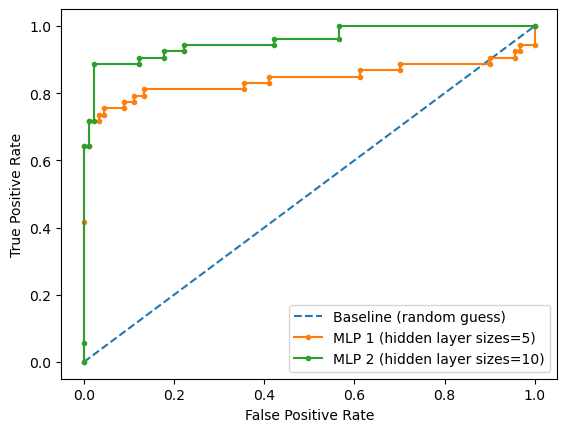

In [17]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit first model(MLP 1)
clf1 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), max_iter=100)
clf1.fit(X_train, y_train)
# fit second model(MLP 2)
clf2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)
clf2.fit(X_train, y_train)


# predict probabilities for different models
lr_probs1 = clf1.predict_proba(X_test)
lr_probs2 = clf2.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('MLP 1 (hidden layer sizes=5): ROC AUC=%.3f' % (lr_auc1))
print('MLP 2 (hidden layer sizes=10): ROC AUC=%.3f' % (lr_auc2))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP 1 (hidden layer sizes=5)')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='MLP 2 (hidden layer sizes=10)')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


<h3><font color="red">Exercise 3 </font> </h3>
<p>Repeat the experiment above and define a new MLP classifier (named MLP 3) try to further improve the accuracy of the MLP 3 by changing the parameters, e.g. increasing 'hidden_layer_sizes' and 'max_iter'. What is the max accuracy you can get by tuning the parameters ?</p>

<p>Use the code cell below to write your code for Excercise 3</p>

In [ ]:
# Answer to Exercise 3

C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Baseline (random guess): ROC AUC=0.500
MLP 1 (hidden layer sizes=5): ROC AUC=0.842
MLP 2 (hidden layer sizes=10): ROC AUC=0.956
MLP 3 (hidden layer sizes=20): ROC AUC=0.984


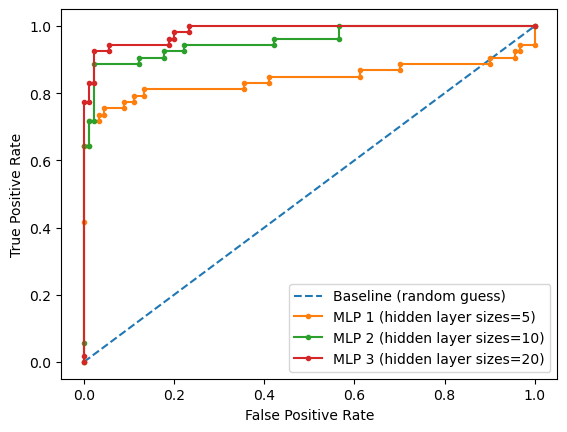

In [30]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit first model(MLP 1)
clf1 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), max_iter=100)
clf1.fit(X_train, y_train)
# fit second model(MLP 2)
clf2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)
clf2.fit(X_train, y_train)
# fit third model(MLP 3)
clf3 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(20,), max_iter=400)
clf3.fit(X_train, y_train)


# predict probabilities for different models
lr_probs1 = clf1.predict_proba(X_test)
lr_probs2 = clf2.predict_proba(X_test)
lr_probs3 = clf3.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('MLP 1 (hidden layer sizes=5): ROC AUC=%.3f' % (lr_auc1))
print('MLP 2 (hidden layer sizes=10): ROC AUC=%.3f' % (lr_auc2))
print('MLP 3 (hidden layer sizes=20): ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP 1 (hidden layer sizes=5)')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='MLP 2 (hidden layer sizes=10)')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='MLP 3 (hidden layer sizes=20)')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [31]:
clf3_predict = clf3.predict(X_test)
# Accuracy factors
print('acc for training data: {:.3f}'.format(clf3.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf3.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf3_predict))

acc for training data: 0.925
acc for test data: 0.923
MLP Classification report:

               precision    recall  f1-score   support

           0       0.96      0.91      0.94        90
           1       0.86      0.94      0.90        53

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



<h3><font color="red">Exercise 4 </font> </h3>
<p>Repeat the experiment in Exercise 3 but instead of a new MLP classifier define a Perceptron (named P 1) on the same dataset (i.e. breast cancer) and compare the result with MLP 1 and MLP 2. What do you think might be the reason for the difference between the performance of the MLP classifiers and the Perceptron on this dataset? Try to chnage the Perceptron parameters (reduce the learning rate, Eta) and repeat the experiment. </p>

<p>Use the code cell below to write your code for Exercise 4</p>

In [ ]:
# Answer to Exercise 4 
# Hint: Unlike MLP, Perceptron doesn't have 'predict_proba' but you can implement it using CalibratedClassifierCV as shown below
#
# ppn = Perceptron(eta0=0.01, random_state=0, max_iter=100)
# ppn = CalibratedClassifierCV(ppn)
#
# and then you can call ppn.predict_proba

Baseline (random guess): ROC AUC=0.500
MLP 1 (hidden layer sizes=5): ROC AUC=0.842
MLP 2 (hidden layer sizes=10): ROC AUC=0.956
P1: ROC AUC=0.908


C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


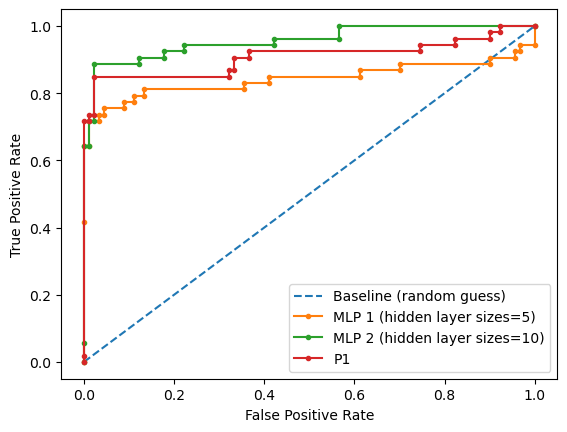

In [48]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit first model(MLP 1)
clf1 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), max_iter=100)
clf1.fit(X_train, y_train)
# fit second model(MLP 2)
clf2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)
clf2.fit(X_train, y_train)
# fit third model(P1)
P1 = Perceptron(eta0=0.01, random_state=0, max_iter=100)
P1.fit(X_train, y_train)
P1 = CalibratedClassifierCV(P1)
P1.fit(X_train, y_train)

# predict probabilities for different models
lr_probs1 = clf1.predict_proba(X_test)
lr_probs2 = clf2.predict_proba(X_test)
lr_probs3 = P1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('MLP 1 (hidden layer sizes=5): ROC AUC=%.3f' % (lr_auc1))
print('MLP 2 (hidden layer sizes=10): ROC AUC=%.3f' % (lr_auc2))
print('P1: ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP 1 (hidden layer sizes=5)')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='MLP 2 (hidden layer sizes=10)')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='P1')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Baseline (random guess): ROC AUC=0.500
MLP 1 (hidden layer sizes=5): ROC AUC=0.842
MLP 2 (hidden layer sizes=10): ROC AUC=0.956
P1: ROC AUC=0.913


C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Andelib\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


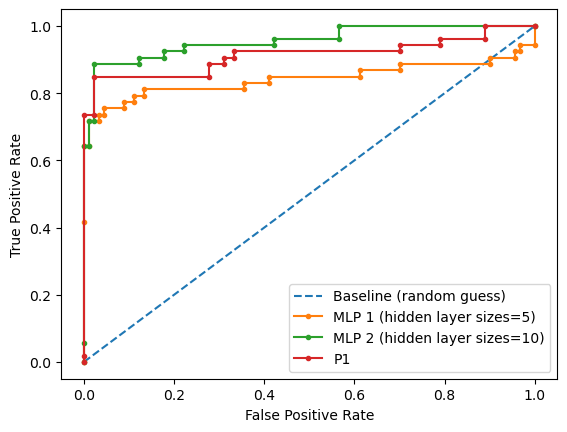

In [50]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit first model(MLP 1)
clf1 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), max_iter=100)
clf1.fit(X_train, y_train)
# fit second model(MLP 2)
clf2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)
clf2.fit(X_train, y_train)
# fit third model(P1)
P1 = Perceptron(eta0=0.005, random_state=0, max_iter=100)
P1.fit(X_train, y_train)
P1 = CalibratedClassifierCV(P1)
P1.fit(X_train, y_train)

# predict probabilities for different models
lr_probs1 = clf1.predict_proba(X_test)
lr_probs2 = clf2.predict_proba(X_test)
lr_probs3 = P1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('MLP 1 (hidden layer sizes=5): ROC AUC=%.3f' % (lr_auc1))
print('MLP 2 (hidden layer sizes=10): ROC AUC=%.3f' % (lr_auc2))
print('P1: ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP 1 (hidden layer sizes=5)')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='MLP 2 (hidden layer sizes=10)')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='P1')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


<h3><font color="red">Save your notebook after completing the exercises and submit it to SurreyLearn (Assessments -> Assignments -> Lab Exercises - Week 3) as a python notebook file in ipynb formt. </h3>
<h3><font color="red">Deadline: 4:00pm Thursday 29 Feb  </h3> 